In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import time
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline

In [ ]:
!pip install tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 28.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      

In [ ]:
# Path to model and labels
model_path = 'keras_model.h5'
labels_path = 'labels.txt'

# Load the trained model
model = load_model(model_path)

In [ ]:
with open(labels_path, 'r') as f:
    labels = f.read().splitlines()

In [ ]:
!unrar x "/content/drive/MyDrive/Data Image Test/Data Image.rar"

Streaming output truncated to the last 5000 lines.
Extracting  Utama/crack/crack (1145).jpg                                   0%  OK 
Extracting  Utama/crack/crack (1146).jpg                                   0%  OK 
Extracting  Utama/crack/crack (1147).jpg                                   0%  OK 
Extracting  Utama/crack/crack (1148).jpg                                   0%  OK 
Extracting  Utama/crack/crack (1149).jpg                                   0%  OK 
Extracting  Utama/crack/crack (115).jpg                                    0%  OK 
Extracting  Utama/crack/crack (1150).jpg                                   0%  OK 
Extracting  Utama/crack/crack (1151).jpg                                   0%  OK 
Extracting  Utama/crack/crack (1152).jpg                                   0%  OK 
Extracting  Utama/crack/crack (1153).jpg                                   0%  OK 
Extracting  Utama/crack/crack

In [ ]:
test_dir = {
    'crack': 'Utama/crack/',
    'good': 'Utama/good/',
    'pothole': 'Utama/pothole/'
}

In [ ]:
img_height, img_width = 224, 224  # Assuming model input size is 224x224
batch_size = 32

In [ ]:
y_true = []
y_pred = []

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
def predict(image):
    img = Image.open(image).convert("RGB")
    img = img.resize((224, 224))
    img_array = np.asarray(img)
    img_array = np.expand_dims(img_array, axis=0)
    normalized_image_array = (img_array.astype(np.float32) / 127.5) - 1
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data[0] = normalized_image_array
    predictions = model.predict(data)
    index = np.argmax(predictions)
    class_name = labels[index]
    confidence_score = predictions[0][index]
    return class_name, confidence_score

In [ ]:
start_time = time.time()

for label, directory in test_dir.items():
    true_label_index = labels.index(label)

    # List all images in the directory
    for img_file in os.listdir(directory):
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory, img_file)

            # Predict using the custom predict function
            predicted_label, _ = predict(img_path)
            predicted_label_index = labels.index(predicted_label)

            # Append to the lists
            y_true.append(true_label_index)
            y_pred.append(predicted_label_index)

end_time = time.time()
classification_time = end_time - start_time

1/1 [==============================] - 0s 56ms/step


In [ ]:
accuracy = accuracy_score(y_true, y_pred)

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)

In [ ]:
results_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

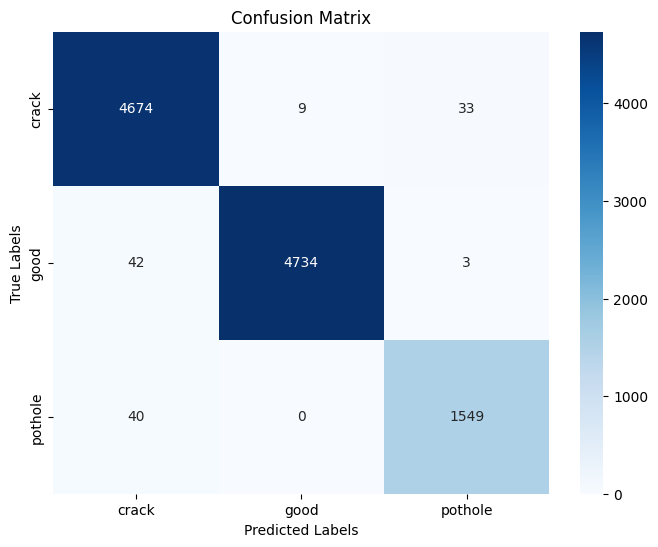

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Print the accuracy and classification time
print(f"Classification Time: {classification_time:.2f} seconds")
print(f"Accuracy: {accuracy * 100:.2f}%")

Classification Time: 704.69 seconds
Accuracy: 98.85%
